In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import os
import sys

In [2]:
labels = pd.read_csv("/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train_labels.csv")   # loading the labels
labels.head()           # will display the first five rows in labels dataframe

,filename,label
0,0.jpg,without_mask
1,1.jpg,without_mask
2,10.jpg,without_mask
3,100.jpg,without_mask
4,101.jpg,without_mask


In [3]:
file_paths = [[fname, '/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train/train/' + fname] for fname in labels['filename']]
# file_paths

In [4]:
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
images.head()

,filename,filepaths
0,0.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...
1,1.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...
2,10.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...
3,100.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...
4,101.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...


In [5]:
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')
train_data.head()  

,filename,filepaths,label
0,0.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...,without_mask
1,1.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...,without_mask
2,10.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...,without_mask
3,100.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...,without_mask
4,101.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...,without_mask


In [6]:
data = []             # initialize an empty numpy array
image_size = 100      # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):
    img_array = cv2.imread(train_data['filepaths'][i])   # Uses BGR instead of RGB, have to change it back..
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)           # converting to RGB
    new_img_array = cv2.resize(img_array, (image_size, image_size))      # resizing the image array
    # encoding the labels. with_mask = 1 and without_mask =  0
    if train_data['label'][i] == 'with_mask':
        data.append([new_img_array, 1])
    else:
        data.append([new_img_array, 0])

In [7]:
# The shape of an image array
data = np.array(data)
data[0][0].shape  # think of it as 2d array with every element consist of 3 element rgb

(100, 100, 3)

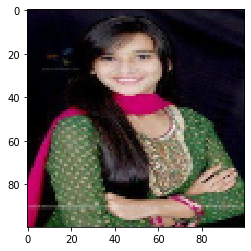

In [8]:
plt.imshow(data[0][0])

In [9]:
# try to use batch, a_data is an array of only 2d arrays(no label)
a_data = []
for i in data:
    if i[1] == 0:
        a_data.append([i[0].reshape((1,) + i[0].shape), 0])
    else:
        a_data.append([i[0].reshape((1,) + i[0].shape), 1])

In [11]:
# create folders for augmented images
# and augment the images without mask
number_to_aug = 4
folder, subfolder1, subfolder2 = "AUG-Train", 'Train-NoMask', 'Train-Mask'
os.makedirs(folder)
os.mkdir(os.path.join('AUG-Train', subfolder1))
os.mkdir(os.path.join(folder, subfolder2))
for img, k in zip(a_data, range(sys.maxsize)):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            rotation_range=60,
            horizontal_flip=True)
    datagen.fit(img[0])
    if img[1] == 0:
        for batch, i in zip(datagen.flow(img[0], batch_size=1, save_to_dir=os.path.join(folder, subfolder1), save_prefix='nomask'+str(k), save_format='jpeg'), range(number_to_aug)):
            pass
    else:
        for batch, i in zip(datagen.flow(img[0], batch_size=1, save_to_dir=os.path.join(folder, subfolder2), save_prefix='mask'+str(k), save_format='jpeg'), range(number_to_aug)):
            pass